In [4]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split ,GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay, classification_report,roc_auc_score,roc_curve
from sklearn.svm import SVC

pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [5]:
# importing the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notebooks/capstone_project/ecommerce_recommendation_dataset.csv')
data.shape

(60000, 51)

In [6]:
data.head()

,user_id,product_id,category,price,rating,review_count,user_age,user_gender,user_location,purchase_history,time_on_page,add_to_cart_count,search_keywords,discount_applied,user_membership,user_browser,user_device,purchase_time,session_duration,clicks_on_ads,page_views,referral_source,wishlist_additions,cart_abandonment_rate,average_spent,user_income,user_education,user_marital_status,product_availability,stock_status,product_return_rate,product_color,product_size,is_top_seller,discount_percentage,time_to_purchase,delivery_time,shipping_fee,seller_rating,seller_response_time,seller_location,product_rating_variance,review_sentiment_score,user_engagement_score,ad_click_rate,time_of_day,day_of_week,season,payment_method,coupon_used,product_popularity
0,78517,1645,Books,842.23,2,155,24,Other,Urban,False,13.86,6,Table,False,Free,Safari,Desktop,2024-08-16 10:00:00,2432.93,12,97,Email,5,0.87,1679.10,42898.60,Master's,Divorced,Pre-order,High,0.32,Green,Large,True,10.81,263.62,14.99,8.19,2,38.71,International,0.13,-0.28,0.68,0.04,Night,Thursday,Summer,Debit Card,False,0.54
1,52887,100,Books,253.76,3,331,43,Other,Suburban,False,13.03,3,Laptop,True,Silver,Safari,Tablet,2024-07-16 23:00:00,407.26,6,70,Search Engine,12,0.97,1281.47,29088.27,PhD,Widowed,In Stock,Low,0.20,Red,Small,False,30.48,143.10,6.74,47.56,3,60.15,Local,0.02,0.28,0.11,0.89,Morning,Saturday,Summer,Debit Card,False,0.77
2,59395,585,Books,483.65,2,236,64,Female,Rural,True,3.75,7,Table,False,Gold,Safari,Tablet,2024-09-27 15:00:00,3018.87,15,28,Direct,6,0.44,452.02,86861.37,Master's,Widowed,In Stock,High,0.08,Blue,Large,False,32.78,161.90,2.85,34.27,3,30.28,National,1.55,0.23,0.35,0.99,Evening,Tuesday,Fall,Debit Card,False,0.14
3,54739,3774,Groceries,459.37,2,227,34,Female,Urban,False,6.01,0,Jeans,True,Platinum,Edge,Tablet,2024-09-20 22:00:00,960.00,9,56,Direct,15,0.03,3920.87,189238.09,High School,Married,Out of Stock,High,0.76,Blue,Large,False,8.92,228.99,1.92,24.46,1,11.38,International,1.41,0.93,0.73,0.16,Afternoon,Tuesday,Spring,Credit Card,False,0.18
4,42723,2119,Groceries,150.11,2,214,51,Female,Urban,True,6.89,9,Novel,False,Gold,Safari,Mobile,2024-09-01 20:00:00,414.98,13,19,Social Media,15,0.50,616.45,142187.76,High School,Married,Out of Stock,Low,0.11,Red,Medium,False,35.97,109.70,13.52,21.56,5,19.43,International,1.29,0.11,0.26,0.17,Night,Wednesday,Spring,PayPal,False,0.66


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,60000.0,50109.404617,28913.382290,1.00,25022.5000,50208.500,75141.5000,99997.00
product_id,60000.0,2491.198100,1441.522417,1.00,1245.0000,2481.500,3731.0000,4999.00
price,60000.0,502.938655,288.082193,5.01,252.8025,504.355,752.5925,999.99
rating,60000.0,2.996383,1.415970,1.00,2.0000,3.000,4.0000,5.00
review_count,60000.0,250.173567,144.807302,0.00,124.0000,251.000,375.0000,499.00
user_age,60000.0,43.425617,14.995046,18.00,30.0000,43.000,56.0000,69.00
time_on_page,60000.0,15.221682,8.485544,0.50,7.9100,15.170,22.5625,30.00
add_to_cart_count,60000.0,4.498617,2.863739,0.00,2.0000,5.000,7.0000,9.00
session_duration,60000.0,1797.510736,1037.231985,1.03,901.7925,1798.315,2692.3300,3599.97
clicks_on_ads,60000.0,9.506933,5.771029,0.00,5.0000,10.000,15.0000,19.00


In [8]:
data.isnull().sum()

,0
user_id,0
product_id,0
category,0
price,0
rating,0
review_count,0
user_age,0
user_gender,0
user_location,0
purchase_history,0


In [9]:
data.dtypes

,0
user_id,int64
product_id,int64
category,object
price,float64
rating,int64
review_count,int64
user_age,int64
user_gender,object
user_location,object
purchase_history,bool


In [10]:
# Checking for duplicates in the data
data.duplicated().sum()

0

In [11]:
# converting the boolean data to object data type
bool_cols = [cols for cols in data if data[cols].dtype == 'bool']
for cols in bool_cols:
  data[cols] = data[cols].astype('object')

In [12]:
# number of numeric columns wiht unique values

for cols in data:
  if data[cols].dtype != 'object':
    if data[cols].nunique() == 1:
      print(f'****{cols} has 1 unique value****')
    else:
      print(f'{cols} has {data[cols].nunique()} unique values')


user_id has 45154 unique values
product_id has 4999 unique values
price has 45014 unique values
rating has 5 unique values
review_count has 500 unique values
user_age has 52 unique values
time_on_page has 2951 unique values
add_to_cart_count has 10 unique values
session_duration has 55235 unique values
clicks_on_ads has 20 unique values
page_views has 99 unique values
wishlist_additions has 20 unique values
cart_abandonment_rate has 101 unique values
average_spent has 56634 unique values
user_income has 59912 unique values
product_return_rate has 101 unique values
discount_percentage has 5001 unique values
time_to_purchase has 25810 unique values
delivery_time has 1401 unique values
shipping_fee has 5001 unique values
seller_rating has 5 unique values
seller_response_time has 7100 unique values
product_rating_variance has 201 unique values
review_sentiment_score has 201 unique values
user_engagement_score has 101 unique values
ad_click_rate has 101 unique values
product_popularity has 

In [13]:
# removing userid and product id columns since they are id columns
data.drop(['user_id','product_id','purchase_time','user_education','user_marital_status','stock_status','product_color','purchase_time','user_membership'],axis = 1,inplace = True)

In [14]:
# number of categorical columns
categorical_cols = [cols for cols in data if data[cols].dtypes == 'O']
print(categorical_cols)
print(len(categorical_cols))

['category', 'user_gender', 'user_location', 'purchase_history', 'search_keywords', 'discount_applied', 'user_browser', 'user_device', 'referral_source', 'product_availability', 'product_size', 'is_top_seller', 'seller_location', 'time_of_day', 'day_of_week', 'season', 'payment_method', 'coupon_used']
18


In [15]:
# Removing user_browser , user_device and referral_source as they dont contribute to the analysis
data.drop(['user_browser','user_device','referral_source'],axis = 1,inplace = True)

In [16]:
# Analysis of dependent/ target attribute
round(data['purchase_history'].value_counts(normalize = True)*100,2)

,proportion
purchase_history,
True,50.15
False,49.85


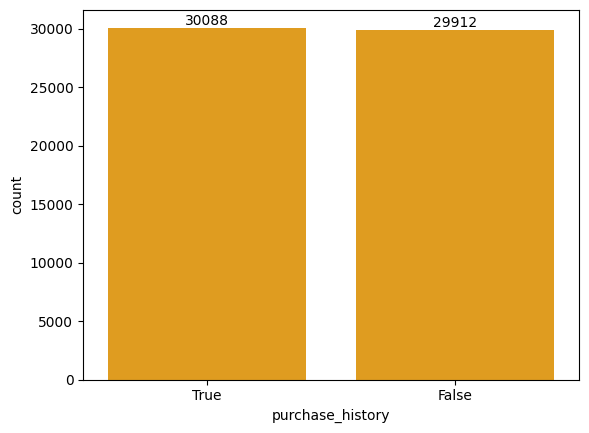

In [17]:
# Plotting the graph for purchase history
ax = sns.countplot(x = data['purchase_history'],
                   order = data['purchase_history'].value_counts().index,color = 'orange')
ax.bar_label(ax.containers[0])
plt.show()

#**Univariate Analysis**

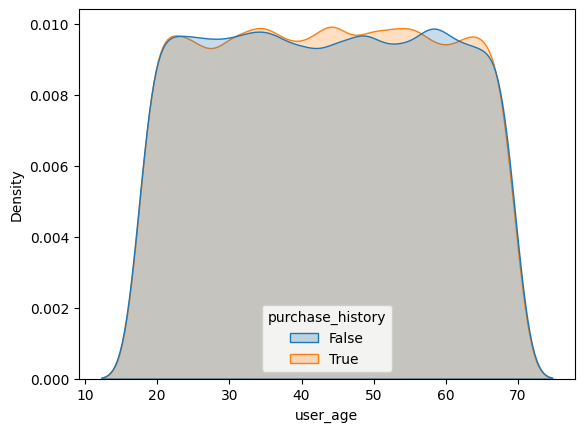

In [18]:
# kde plot on age of customers and target variable
sns.kdeplot(x= 'user_age' ,fill = True, hue = 'purchase_history', data = data)
plt.show()

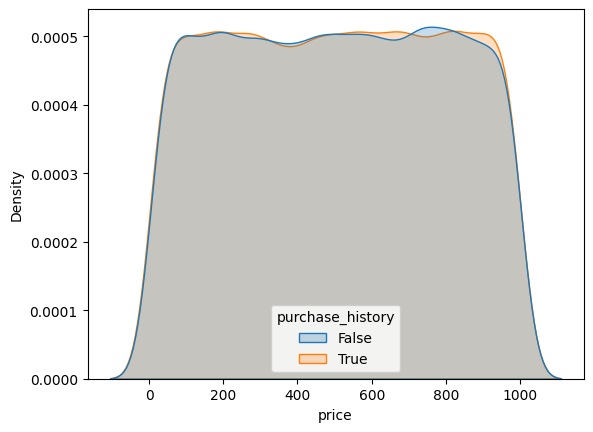

In [19]:
sns.kdeplot(x = 'price', fill  = True, hue = 'purchase_history', data = data)
plt.show()

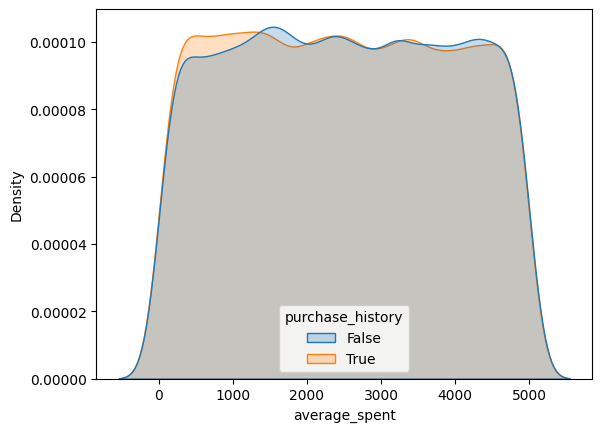

In [20]:
sns.kdeplot(x = 'average_spent',fill = True, hue = 'purchase_history', data = data)
plt.show()


# **Bivariate Analysis**

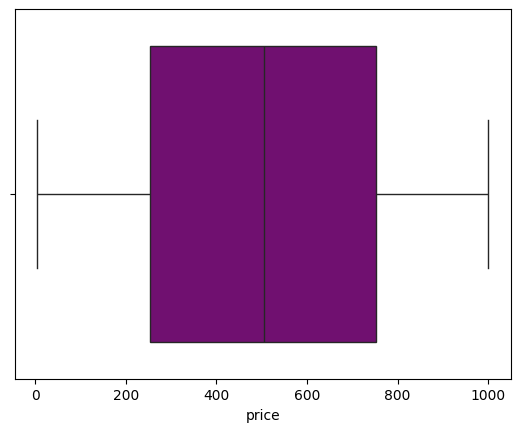

In [21]:
# barchart to show correlation betweeen different variables
sns.boxplot(data['price'], orient = 'h', color = 'purple')
plt.show()

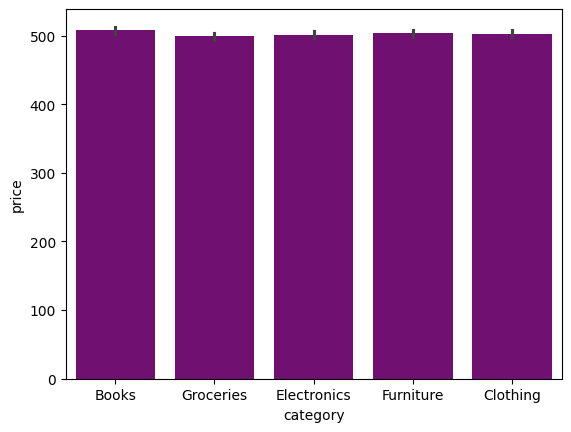

In [22]:
sns.barplot(y = data['price'],x = data['category'], color = 'purple')
plt.show()

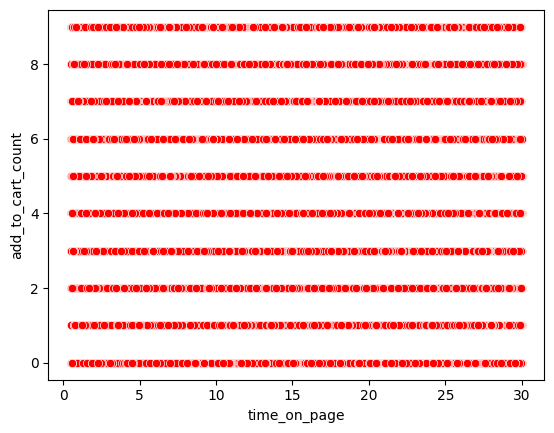

In [23]:
sns.scatterplot(x = data['time_on_page'], y = data['add_to_cart_count'],color = 'red')
plt.show()

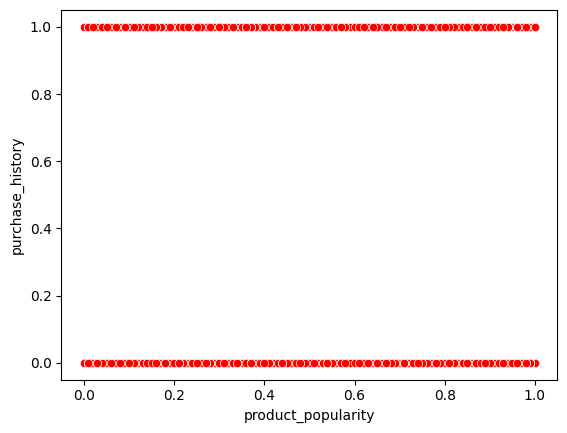

In [24]:
sns.scatterplot(x = data['product_popularity'], y = data['purchase_history'],color = 'red')
plt.show()

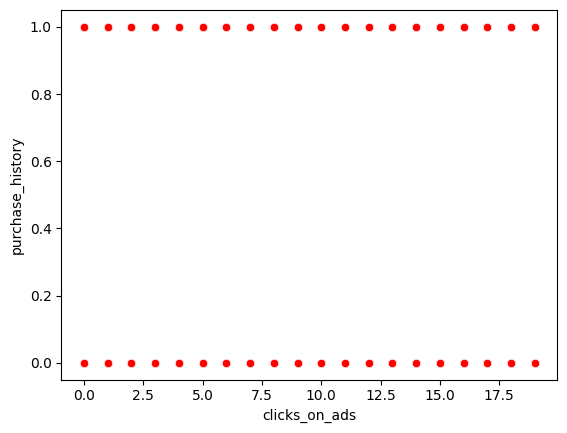

In [25]:
sns.scatterplot(x = data['clicks_on_ads'], y = data['purchase_history'],color = 'red')
plt.show()

In [26]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

## Multivariate analysis

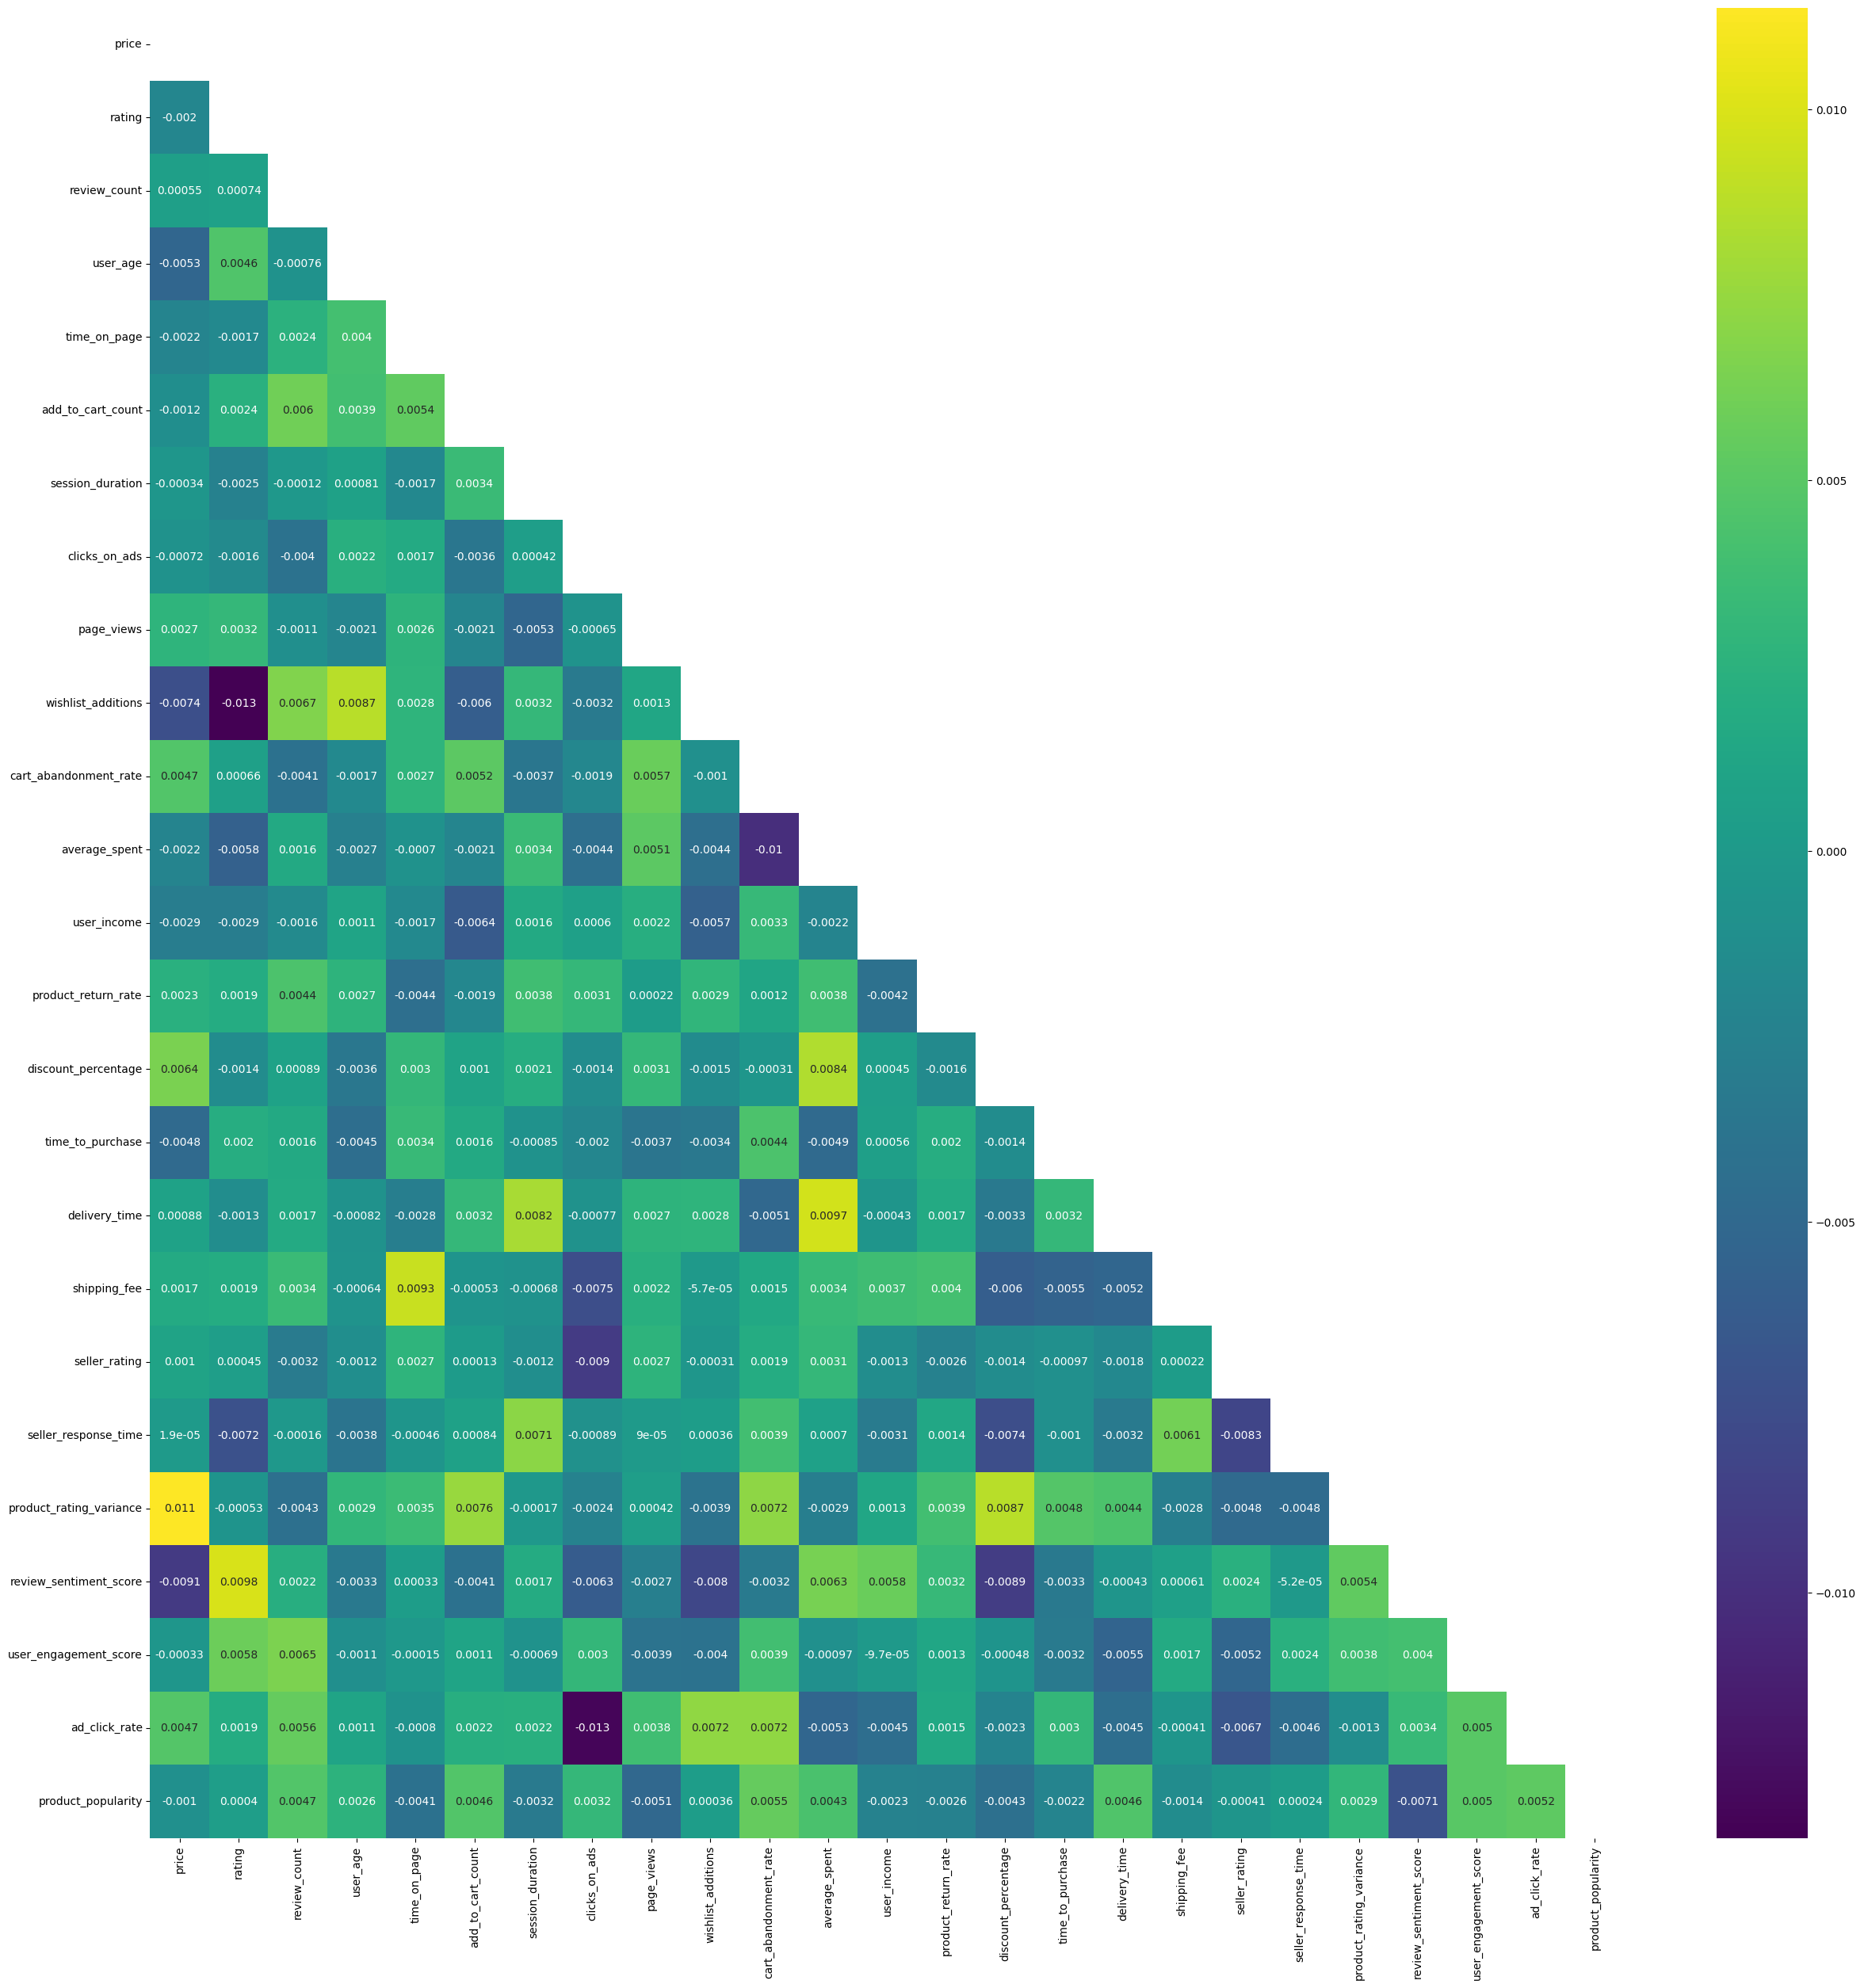

In [27]:
numerical_df = data.select_dtypes(include = ['int64','float64'])
corr = numerical_df.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr, cmap = 'viridis',annot = True,mask = np.triu(corr))
plt.show()

In [28]:
# Therefore we can see that the data attributes
#  have very less correlation among themselves

# Model Creation

In [29]:
cat_cols = [cols for cols in data if data[cols].dtype == 'O']
for cols in cat_cols:
  print(cols,':', data[cols].unique())

category : ['Books' 'Groceries' 'Electronics' 'Furniture' 'Clothing']
user_gender : ['Other' 'Female' 'Male']
user_location : ['Urban' 'Suburban' 'Rural']
purchase_history : [False True]
search_keywords : ['Table' 'Laptop' 'Jeans' 'Novel' 'Smartphone']
discount_applied : [False True]
product_availability : ['Pre-order' 'In Stock' 'Out of Stock']
product_size : ['Large' 'Small' 'Medium']
is_top_seller : [True False]
seller_location : ['International' 'Local' 'National']
time_of_day : ['Night' 'Morning' 'Evening' 'Afternoon']
day_of_week : ['Thursday' 'Saturday' 'Tuesday' 'Wednesday' 'Sunday' 'Friday' 'Monday']
season : ['Summer' 'Fall' 'Spring' 'Winter']
payment_method : ['Debit Card' 'Credit Card' 'PayPal' 'Cash']
coupon_used : [False True]


In [30]:
encoder = LabelEncoder()
for cols in cat_cols:
  data[cols] = encoder.fit_transform(data[cols])
data.head()

,category,price,rating,review_count,user_age,user_gender,user_location,purchase_history,time_on_page,add_to_cart_count,search_keywords,discount_applied,session_duration,clicks_on_ads,page_views,wishlist_additions,cart_abandonment_rate,average_spent,user_income,product_availability,product_return_rate,product_size,is_top_seller,discount_percentage,time_to_purchase,delivery_time,shipping_fee,seller_rating,seller_response_time,seller_location,product_rating_variance,review_sentiment_score,user_engagement_score,ad_click_rate,time_of_day,day_of_week,season,payment_method,coupon_used,product_popularity
0,0,842.23,2,155,24,2,2,0,13.86,6,4,0,2432.93,12,97,5,0.87,1679.10,42898.60,2,0.32,0,1,10.81,263.62,14.99,8.19,2,38.71,0,0.13,-0.28,0.68,0.04,3,4,2,2,0,0.54
1,0,253.76,3,331,43,2,1,0,13.03,3,1,1,407.26,6,70,12,0.97,1281.47,29088.27,0,0.20,2,0,30.48,143.10,6.74,47.56,3,60.15,1,0.02,0.28,0.11,0.89,2,2,2,2,0,0.77
2,0,483.65,2,236,64,0,0,1,3.75,7,4,0,3018.87,15,28,6,0.44,452.02,86861.37,0,0.08,0,0,32.78,161.90,2.85,34.27,3,30.28,2,1.55,0.23,0.35,0.99,1,5,0,2,0,0.14
3,4,459.37,2,227,34,0,2,0,6.01,0,0,1,960.00,9,56,15,0.03,3920.87,189238.09,1,0.76,0,0,8.92,228.99,1.92,24.46,1,11.38,0,1.41,0.93,0.73,0.16,0,5,1,1,0,0.18
4,4,150.11,2,214,51,0,2,1,6.89,9,2,0,414.98,13,19,15,0.50,616.45,142187.76,1,0.11,1,0,35.97,109.70,13.52,21.56,5,19.43,0,1.29,0.11,0.26,0.17,3,6,1,3,0,0.66


In [31]:
# splitting the data into training and testing
x = data.drop('purchase_history',axis = 1)
y = data['purchase_history']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

print('Dimension of x_train, x_test', x_train.shape,x_test.shape)
print('Dimension of y_train,y_test',y_train.shape, y_test.shape)

Dimension of x_train, x_test (48000, 39) (12000, 39)
Dimension of y_train,y_test (48000,) (12000,)


In [32]:
# Data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled =scaler.transform(x_test)

In [33]:
# Logistic Regression Model
logreg_mdl = LogisticRegression(random_state = 42, verbose = 3)
logreg_mdl.fit(x_train_scaled, y_train)
print('Training Accuracy: ', round(logreg_mdl.score(x_train_scaled, y_train)*100,2),'%')

Training Accuracy:  51.84 %


Testing Accuracy:  50.29 %
Classification Report:

                precision    recall  f1-score   support

           0       0.50      0.48      0.49      5966
           1       0.51      0.53      0.52      6034

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



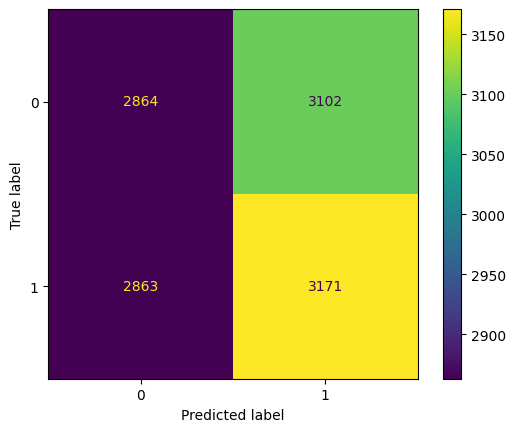

In [ ]:
# Model testing
y_pred = logreg_mdl.predict(x_test_scaled)

# metrics
print('Testing Accuracy: ', round(accuracy_score(y_test, y_pred)*100,2),'%')
cm = ConfusionMatrixDisplay.from_predictions(y_test , y_pred)
print('Classification Report:\n\n ',classification_report(y_test,y_pred))

## **Hyper Parameter tuning on LOGREG model**

In [ ]:
estimator  = LogisticRegression(random_state = 42)
grid_params = {'l1_ratio':[0.5,1],
               'max_iter':[100,150,175,200]}

cv = GridSearchCV(estimator = estimator, param_grid = grid_params, n_jobs = -1, verbose = 3, scoring  = 'accuracy',)
cv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'l1_ratio': [0.5, 1],
                         'max_iter': [100, 150, 175, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
best_params = cv.best_params_

In [ ]:
new_model = LogisticRegression(random_state = 42, **best_params)
new_model.fit(x_train_scaled, y_train)
print('Training_score: ', round(new_model.score(x_train_scaled, y_train)*100,2),'%')

Training_score:  51.84 %


Testing Accuracy:  50.29 %
Classification Report: 

               precision    recall  f1-score   support

           0       0.50      0.48      0.49      5966
           1       0.51      0.53      0.52      6034

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



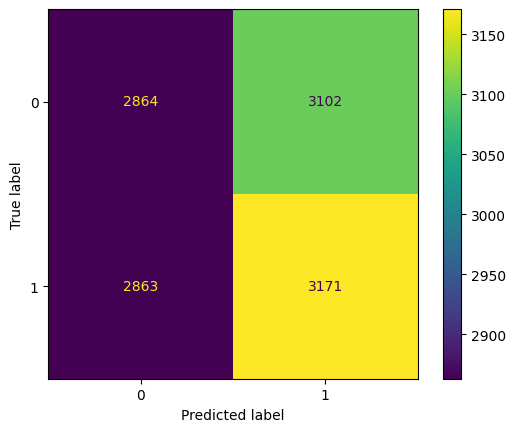

In [ ]:
y_pred_cv = new_model.predict(x_test_scaled)

print('Testing Accuracy: ', round(accuracy_score(y_test, y_pred_cv)*100,2),'%')
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred_cv)
print('Classification Report: \n\n',classification_report(y_test,y_pred_cv))

## **Random Forest**

In [ ]:
rf_mdl = RandomForestClassifier(random_state = 42, verbose = 1,n_jobs = -1, n_estimators = 150)
rf_mdl.fit(x_train_scaled, y_train)
print('Training Accuracy: ', round(rf_mdl.score(x_train_scaled, y_train)*100,2),'%')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   38.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s


Training Accuracy:  100.0 %


[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    2.7s finished


In [ ]:
y_pred = rf_mdl.predict(x_test_scaled)

print('Testing Accuracy: ', round(accuracy_score(y_test, y_pred)*100,2),'%')

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s


Testing Accuracy:  50.7 %


[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.7s finished


**Hyper Parameter Tuning**

In [ ]:
# rf_est = RandomForestClassifier(random_state = 42, n_jobs = -1)
# rf_cv = GridSearchCV(rf_est, param_grid = {'criterion':['gini','entropy'],
#                                                   'bootstrap':[True,False],
#                                                   'max_features':['sqrt','log2',None,'auto']},verbose = 3)
# rf_cv.fit(x_train_scaled, y_train)
# best_params = rf_cv.best_params_
# best_params

In [ ]:
# final_model = RandomForestClassifier(**best_params, random_state  = 42, n_jobs = -1)
# final_model.fit(x_train_scaled, y_train)
# print('Training Accuracy: ', round(final_model.score(x_train_scaled, y_train)*100,2),'%')

# taking too much time so not running this cell

## **DecisionTree**

Training Accuracy:  100.0 %
Testing Accuracy:  49.83 %

Classification Report: 

               precision    recall  f1-score   support

           0       0.50      0.49      0.49      5966
           1       0.50      0.51      0.50      6034

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



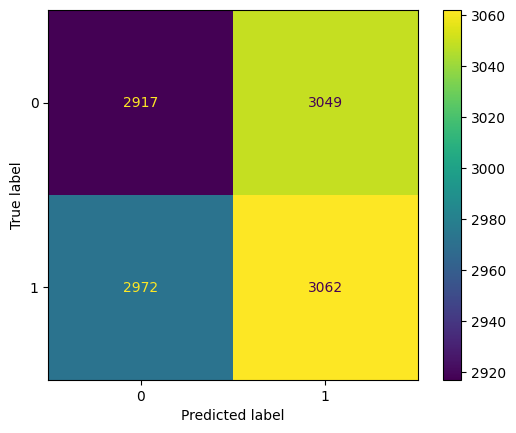

In [ ]:
model =DecisionTreeClassifier()
model.fit(x_train_scaled, y_train)
training_score = model.score(x_train_scaled, y_train)
print('Training Accuracy: ', round(training_score*100,2),'%')

y_pred = model.predict(x_test_scaled)

cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print('Testing Accuracy: ',round(accuracy_score(y_test,y_pred)*100,2),'%')
print('\nClassification Report: \n\n',classification_report(y_test,y_pred))

## **AdaBoost**

In [ ]:
tree = DecisionTreeClassifier(random_state = '42',max_depth = 1)
adaboost = AdaBoostClassifier(estimator = tree, n_estimators = 100)
adaboost.fit(x_train_scaled, y_train)
print('Training Accuracy: ', round(adaboost.score(x_train_scaled, y_train)*100,2),'%')

Training Accuracy:  51.73 %


Testing Accuracy:  50.47 %


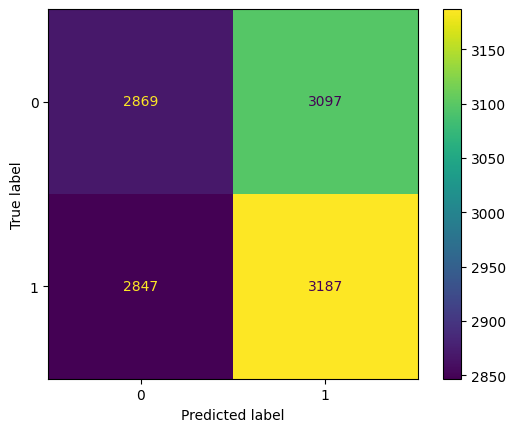

In [ ]:
y_pred = adaboost.predict(x_test_scaled)
cm  = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print('Testing Accuracy: ',round(accuracy_score(y_test,y_pred)*100,2),'%')

## **SVM-SVC**

In [ ]:
# SVC with default parameters
svc_dl = SVC()
svc_dl.fit(x_train_scaled, y_train)
print('Default Parameter Training Score: ',round(svc_dl.score(x_train_scaled,y_train)*100,2),'%')

Default Parameter Training Score:  72.52 %


Testing accuracy:  50.57 %


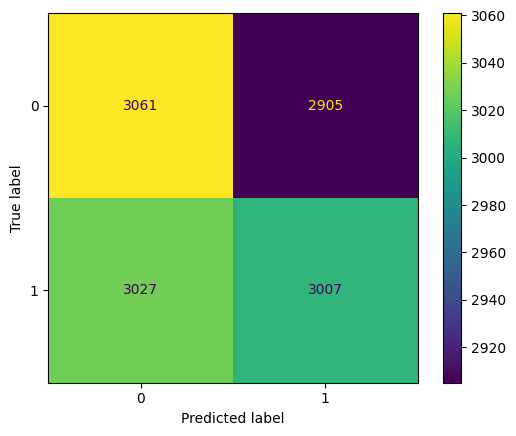

In [ ]:
y_pred = svc_dl.predict(x_test_scaled)
print('Testing accuracy: ',round(accuracy_score(y_test,y_pred)*100,2),'%')

cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

## **Hyper Parameter Tuning SVM-SVC**

In [ ]:
estimator  = SVC(random_state = 42)
param_grid = {'kernel':['linear','rbf','poly'],
              'C':np.arange(0,10,0.5),
              'gamma':np.arange(0,5,0.5)}

grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid, cv = 5, scoring  ='accuracy',n_jobs =-1, verbose = 2)
grid_search.fit(x_train_scaled,y_train)
best_param = grid_search.best_params_
print(best_param)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


KeyboardInterrupt: 

In [ ]:
# model with best parameters
final_model = SVC(**best_param, random_state = 42)
final_model.fit(x_train_scaled, y_train)
print('Final Training Score: ',round(final_model.score(x_train_scaled, y_train)*100,2),'%')

In [ ]:
y_pred = final_model.predict(x_test_scaled)
print('Final Testing score: ',round(accuracy_score(y_test, y_pred)*100,2),'%')

In [ ]:
cm  = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
report = classification_report(y_test,y_pred)
print('Classification Report: \n\n',report)

## **ROC- AUC Curve**

ROC AUC Score: 0.5020522325661346


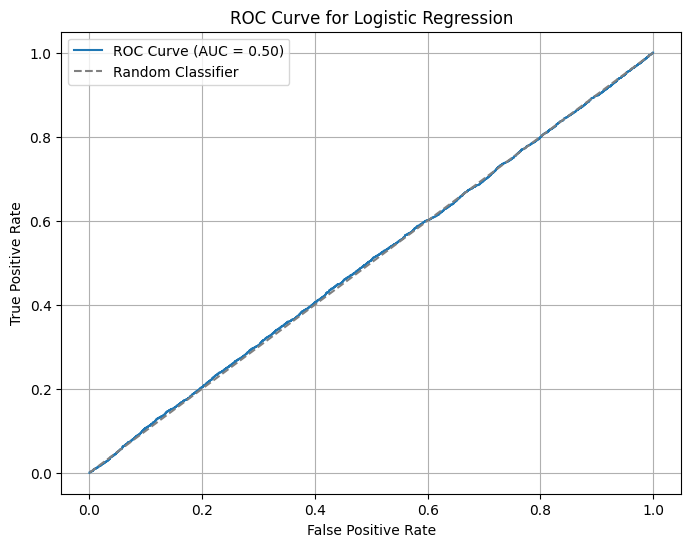

In [34]:
# Calculate predicted probabilities
y_pred_proba = logreg_mdl.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


***Conclusion:-
 Despite all the efforts of making the dataset as good for the ML models as possible and trying many classification models available , the lack of a good training and testing score can simply be the cause of a fault in the dataset which needs to be reviewed***